### 1. Cek Versi TensorFlow

In [ ]:
import tensorflow as tflow
print(tflow.__version__)

2.8.0


### 2. Download & Un-ZIP datasets

In [ ]:
!pip install -q kaggle

!mkdir ~/.kaggle

!cp /work/kaggle.json ~/.kaggle/

!chmod 600 ~./kaggle/kaggle.json

!kaggle datasets download -d mlanangafkaar/datasets-lemlitbang-sibi-alphabets

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
chmod: cannot access '~./kaggle/kaggle.json': No such file or directory
 99%|██████████████████████████████████████▋| 1.74G/1.75G [00:14<00:00, 102MB/s]
100%|██████████████████████████████████████| 1.75G/1.75G [00:24<00:00, 77.4MB/s]


In [ ]:
# !wget --no-check-certificate \
#   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

In [ ]:
import zipfile,os
file_zip = '/work/datasets-lemlitbang-sibi-alphabets.zip'
file_ekstrak = zipfile.ZipFile(file_zip, 'r')
file_ekstrak.extractall('/work/foto')
file_ekstrak.close()
 
file_mentah = 'foto/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW'
file_latih = os.path.join('foto/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/training')
file_validasi = os.path.join('foto/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/validation')

### 3. Set-Up Direktori

In [ ]:
os.listdir(file_latih)

['O',
 'E',
 'Q',
 'V',
 'H',
 'B',
 'X',
 'R',
 'F',
 'L',
 'A',
 'K',
 'U',
 'W',
 'C',
 'I',
 'D',
 'N',
 'Z',
 'P',
 'J',
 'T',
 'S',
 'Y',
 'M',
 'G',
 'desktop.ini']

In [ ]:
os.listdir(file_validasi)

['L',
 'F',
 'R',
 'X',
 'U',
 'K',
 'A',
 'Q',
 'E',
 'O',
 'desktop.ini',
 'B',
 'H',
 'V',
 'T',
 'J',
 'G',
 'M',
 'Y',
 'S',
 'I',
 'C',
 'W',
 'P',
 'Z',
 'N',
 'D']

### 4. Pre-Processing (Image Augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
data_latih = ImageDataGenerator(
                    # rotation_range=360,
                    # width_shift_range=0.2,
                    # height_shift_range=0.2,
                    rescale=1./255,
                    shear_range = 0.6,
                    zoom_range = 0.4,
                    validation_split=0.4,
                    fill_mode = "nearest")
 
data_validasi = ImageDataGenerator(rescale=1./255,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.8,
                    zoom_range = 0.4,
                    validation_split=0.4,
                    fill_mode = "nearest")

### 5. Pre-Training & Validation

In [ ]:
latih_penggenerasi = data_latih.flow_from_directory(
    file_latih,
    target_size=(150, 150),
    batch_size=16,
    shuffle=True,
    interpolation='nearest',
    class_mode='categorical',
    subset='training')

validasi_penggenerasi = data_latih.flow_from_directory(
    file_latih,
    target_size=(150, 150),
    batch_size=16,
    shuffle=True,
    interpolation='nearest',
    class_mode='categorical',
    subset='validation')

Found 286 images belonging to 26 classes.
Found 182 images belonging to 26 classes.


### 6. Membuat Arsitektur Machine learning (CNN)

In [ ]:
bentuk = tflow.keras.models.Sequential([
    tflow.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer=tflow.keras.initializers.HeNormal() , input_shape=(150, 150, 3)),
    tflow.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tflow.keras.layers.Dropout(0.25),
    tflow.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tflow.keras.regularizers.l2(l=0.01)),
    tflow.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tflow.keras.layers.Dropout(0.25),
    tflow.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tflow.keras.regularizers.l2(l=0.01)),
    tflow.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tflow.keras.layers.Dropout(0.25),
    tflow.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tflow.keras.regularizers.l2(l=0.01)),
    tflow.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    tflow.keras.layers.Dropout(0.25),
    tflow.keras.layers.Flatten(),
    tflow.keras.layers.Dense(512, activation='relu', kernel_regularizer=tflow.keras.regularizers.l2(l=0.01)),
    tflow.keras.layers.Dropout(0.25),
    tflow.keras.layers.Dense(26, activation='softmax')
])

### 7. Compile & Training

In [ ]:
bentuk.compile(loss=tflow.keras.losses.CategoricalCrossentropy(),
              optimizer=tflow.optimizers.SGD(nesterov=True, learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
sejarah = bentuk.fit(
      latih_penggenerasi, 
      epochs=50,
      # steps_per_epoch=60, 
      validation_data=validasi_penggenerasi,
      # validation_steps=60,
      shuffle=True,
      verbose=1)

Epoch 1/50
18/18 [==============================] - 47s 3s/step - loss: 15.5423 - accuracy: 0.0315 - val_loss: 15.0357 - val_accuracy: 0.0385
Epoch 2/50
18/18 [==============================] - 45s 2s/step - loss: 14.6980 - accuracy: 0.0280 - val_loss: 14.2956 - val_accuracy: 0.0385
Epoch 3/50
18/18 [==============================] - 45s 2s/step - loss: 13.9322 - accuracy: 0.0350 - val_loss: 13.5299 - val_accuracy: 0.0440
Epoch 4/50
18/18 [==============================] - 45s 2s/step - loss: 13.1882 - accuracy: 0.0420 - val_loss: 12.8063 - val_accuracy: 0.0385
Epoch 5/50
18/18 [==============================] - 45s 2s/step - loss: 12.4837 - accuracy: 0.0280 - val_loss: 12.1320 - val_accuracy: 0.0495
Epoch 6/50
18/18 [==============================] - 45s 3s/step - loss: 11.8312 - accuracy: 0.0280 - val_loss: 11.5050 - val_accuracy: 0.0385
Epoch 7/50
18/18 [==============================] - 44s 2s/step - loss: 11.2269 - accuracy: 0.0350 - val_loss: 10.9222 - val_accuracy: 0.0549
Epoch 

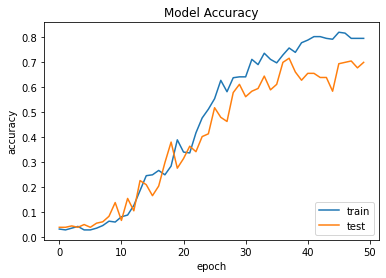

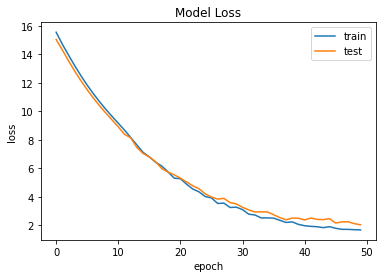

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sejarah.history['accuracy'])
plt.plot(sejarah.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(sejarah.history['loss'])
plt.plot(sejarah.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### 8. Prediksi

In [ ]:
!pip install google.colab

     |████████████████████████████████| 72 kB 3.4 MB/s 
     |████████████████████████████████| 64 kB 7.9 MB/s 
     |████████████████████████████████| 104 kB 72.0 MB/s 
     |████████████████████████████████| 758 kB 50.8 MB/s 
     |████████████████████████████████| 8.0 MB 51.8 MB/s 
     |████████████████████████████████| 10.1 MB 49.4 MB/s 
     |████████████████████████████████| 57 kB 14.5 MB/s 
     |████████████████████████████████| 484 kB 39.4 MB/s 
     |████████████████████████████████| 245 kB 67.4 MB/s 
     |████████████████████████████████| 58 kB 16.3 MB/s 
     |████████████████████████████████| 118 kB 46.2 MB/s 
     |████████████████████████████████| 133 kB 14.9 MB/s 
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102289 sha256=b0140c6d0e1f3eeb0dfc843b990f2d30aff58f456169ac590e5219184e133151
  Stored in directory: /root/.cache/pip/wheels/f6/3b/58/f34ea9045a7c69bd5634978bf25ac60277e90997d9e6e74192
  Created wheel for portpicker: fil

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FE49C3D0ED0>
X


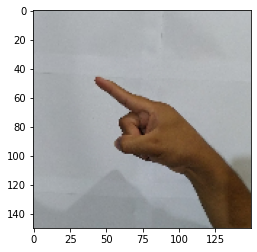

In [ ]:
import numpy as np
# from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# buat_ngetes = '/work/foto/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/A (4).jpg'

# for foto in buat_ngetes.keys():
 
# tempat = foto
gambar = image.load_img('/work/foto/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/Z (4).jpg', target_size=(150,150, 3))
imgplot = plt.imshow(gambar)
x = image.img_to_array(gambar)
x = np.expand_dims(x, axis=0)

gambars = np.vstack([x])
kelas = bentuk.predict(gambars, batch_size=16)
keluaran = np.argmax(kelas)

print(gambar)
if keluaran==0:
    print('A')
elif keluaran==1:
    print('B')
elif keluaran==2:
    print('C')
elif keluaran==3:
    print('D')
elif keluaran==4:
    print('E')
elif keluaran==5:
    print('F')
elif keluaran==6:
    print('G')
elif keluaran==7:
    print('H')
elif keluaran==8:
    print('I')
elif keluaran==9:
    print('J')
elif keluaran==10:
    print('K')
elif keluaran==11:
    print('L')
elif keluaran==12:
    print('M')
elif keluaran==13:
    print('N')
elif keluaran==14:
    print('O')
elif keluaran==15:
    print('P')
elif keluaran==16:
    print('Q')
elif keluaran==17:
    print('R')
elif keluaran==18:
    print('S')
elif keluaran==19:
    print('T')
elif keluaran==20:
    print('U')
elif keluaran==21:
    print('V')
elif keluaran==22:
    print('W')
elif keluaran==23:
    print('X')
elif keluaran==24:
    print('Y')
elif keluaran==25:
    print('Z')
else:
    print('Bukan Tangan :)')

In [ ]:
pengubah = tflow.lite.TFLiteConverter.from_keras_model(bentuk)
bentuk_tflite = pengubah.convert()

with tflow.io.gfile.GFile('bentuk.tflite', 'wb') as f:
  f.write(bentuk_tflite)


INFO:tensorflow:Assets written to: /tmp/tmps56jpx30/assets


In [ ]:
bentuk.save('manisya.h5')

In [ ]:
save_path = '/work/manisya-model/'
tflow.saved_model.save(bentuk, save_path)

INFO:tensorflow:Assets written to: /work/manisya-model/assets
INFO:tensorflow:Assets written to: /work/manisya-model/assets


## SEMANGAT BANG

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b2ee004-ce3a-4479-9946-47b54c53b0ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>